<a href="https://colab.research.google.com/github/joseogg/weibull-distribution/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power


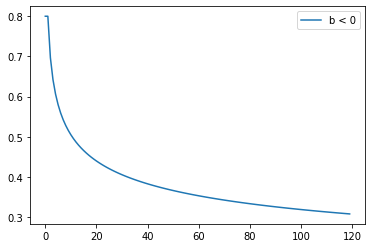

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


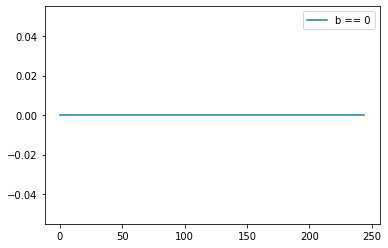

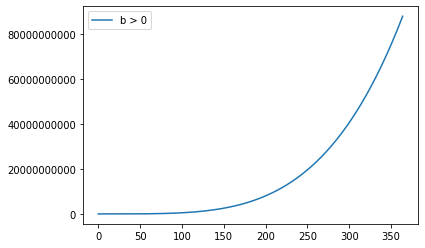

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


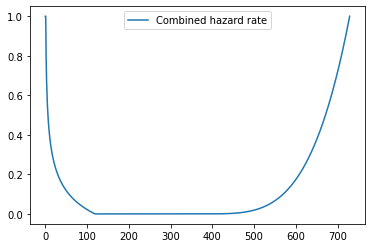

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

left_beta = 0.8
right_beta = 5          

# life span of two years = 120 + 245 + 365

early_life_days = 120
useful_life_days = 245
wearout_life_days = 365

max_early_life_failure_rate = 0.2
max_useful_life_failure_rate = 0.01
max_wearout_life_failure_rate = 0.4

x_early_life = np.arange(early_life_days, dtype=float)
x_useful_life = np.arange(useful_life_days, dtype=float)
x_wearout_life = np.arange(wearout_life_days, dtype=float)

# formula extracted from https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm
# Heckert, N. A., & Filliben, J. J. (2003). NIST/SEMATECH e-Handbook of Statistical Methods; Chapter 1: Exploratory Data Analysis.

def weibull_hazard(x, b): 

    vector = b*(x**(b-1))
    vector[vector == float('inf')] = b
    vector[np.isnan(vector)] = 0
    return vector

def scale_min_max(vector):
    minimum = min(vector)
    maximum = max(vector)
    if (maximum - minimum) == 0:
        return vector        
    vector = (vector - minimum)/(maximum - minimum)
    return vector

                    
plt.plot(weibull_hazard(x_early_life, left_beta), label='b < 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_useful_life, 0), label='b == 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_wearout_life, right_beta), label='b > 0')
plt.ticklabel_format(style='plain')    
plt.legend()
plt.show()

bathtub = np.concatenate((scale_min_max(weibull_hazard(x_early_life, left_beta)), 
                         scale_min_max(weibull_hazard(x_useful_life, 0)),
                         scale_min_max(weibull_hazard(x_wearout_life, right_beta))))

plt.plot(bathtub, label='Combined hazard rate')
plt.legend()
plt.show()



In [ ]:
from random import random

def check_over_for_failure(day,
                           bathtub, 
                           max_early_life_failure_rate,
                           max_useful_life_failure_rate,
                           max_wearout_life_failure_rate,
                           early_life_days,
                           useful_life_days,
                           wearout_life_days):

    if day < early_life_days:
        if random() < (max_early_life_failure_rate * bathtub[day]):
            return 1 # early life failure
    elif day < useful_life_days:
        if random() < max_useful_life_failure_rate:
            return 1 # useful life failure
    else: 
        if day >= bathtub.size: # day >= max_days
            day = bathtub.size - 1
        if random() < (max_wearout_life_failure_rate * bathtub[day]):
            return 1 # wearout life failure
    return 0 # does not fail

pod_failures = np.array([])

failures_over_two_years = []

for day in range(730):
    result = check_over_for_failure(day,
                                    bathtub,
                                    max_early_life_failure_rate,
                                    max_useful_life_failure_rate,
                                    max_wearout_life_failure_rate,
                                    early_life_days,
                                    useful_life_days,
                                    wearout_life_days)
    failures_over_two_years.append(result)
    
print(np.array(failures_over_two_years))



[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Generate synthetic data on failures for building models

In [ ]:
num_pods = 5 
pod_size = 10 
num_days = early_life_days + useful_life_days + wearout_life_days
failure_data = np.zeros((num_pods, pod_size, num_days))

# Generates synthetic data about servers' failures for a given number of PODs
for pod in range(num_pods):
  # Generate randomly life progresses of servers between 0 and num_days
  life_progresses = (np.random.random(pod_size) * num_days).astype(int)
  # print(life_progresses)
  # Generates failures for each server based on their life progress
  for server in range(pod_size):
      failures_for_two_years = []
      # Verify whether the server fails for a given day based on its life progress
      for day in range(life_progresses[server], life_progresses[server] + num_days):
        server_failure = check_over_for_failure(day,
                                                bathtub,
                                                max_early_life_failure_rate,
                                                max_useful_life_failure_rate,
                                                max_wearout_life_failure_rate,
                                                early_life_days,
                                                useful_life_days,
                                                wearout_life_days)
        failures_for_two_years.append(server_failure)
      failure_data[pod][server] = np.array(failures_for_two_years)

      

failure_data


array([[[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 0., 1.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 1.]],

    

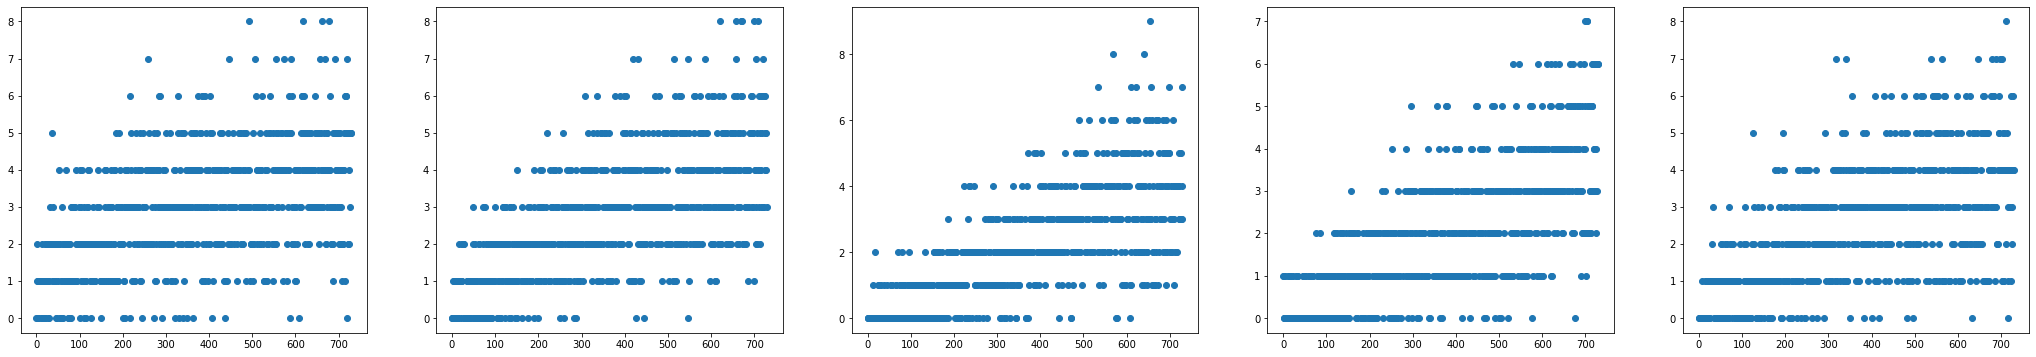

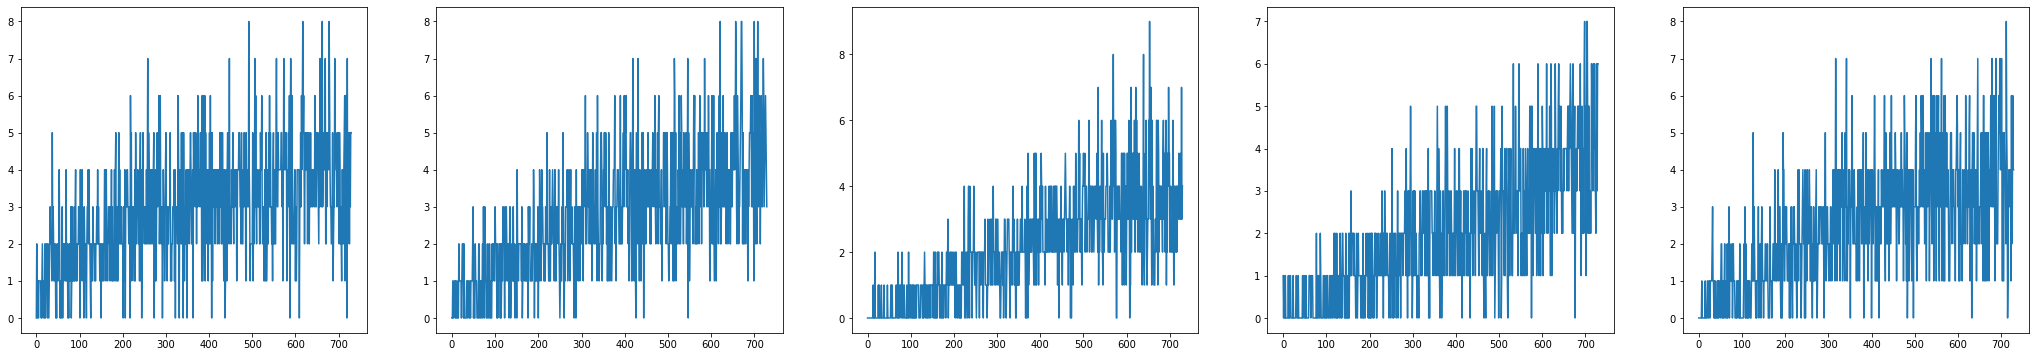

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.scatter(range(failure_data.shape[2]), np.sum(failure_data[i], axis=0))
plt.show()

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.plot(np.sum(failure_data[i], axis=0))
plt.show()







# Simple Exponential Smoothing 

Simple Exponential Smoothing is used for time series prediction when the data particularly does not follow any:

- Trend: An upward or downward slope
- Seasonality: Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.

References 

* Hewamalage, H., Bergmeir, C., & Bandara, K. (2021). Recurrent neural networks for time series forecasting: Current status and future directions. International Journal of Forecasting, 37(1), 388-427.

* Hands-On Guide to Time Series Analysis using Simple Exponential Smoothing in Python. Available at:
https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/#:~:text=Simple%20Exponential%20Smoothing%20(SES)%20is,statsmodel%20using%20pip%20install%20statsmodel.&text=Simple%20Exponential%20Smoothing%20is%20defined,where%20we%20will%20import%20it.




1312.3874802235462 728    3.669962
729    3.683152
730    3.695815
731    3.695815
732    3.695815
733    3.695815
dtype: float64 3.6958151491765188


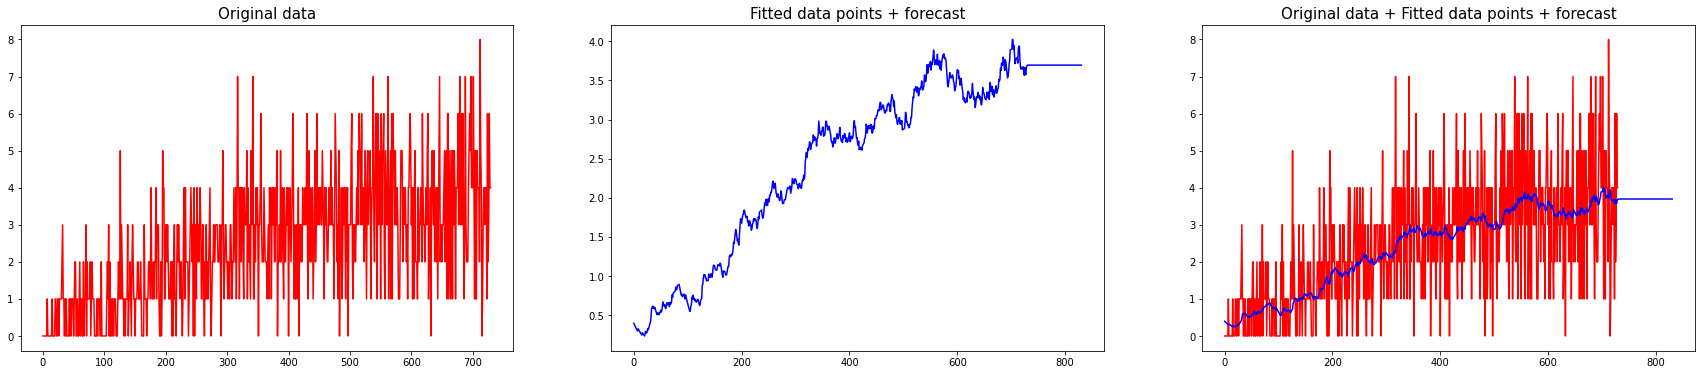

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd

fig = plt.figure(figsize=(30, 6))

steps_to_forecast = 100

data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

optimized_model = SimpleExpSmoothing(data).fit()
optimized_forecast = optimized_model.forecast(steps_to_forecast)
print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Original data", fontsize=15)
ax.plot(data, color="red") 

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Fitted data points + forecast", fontsize=15)
no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                               optimized_forecast.array.reshape(1, -1)))
ax.plot(no_weight_history.reshape(-1,), color='blue') 

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
ax.plot(data, color="red") 
ax.plot(no_weight_history.reshape(-1,), color="blue") 

plt.show()


1312.3874802235462 728    3.669962
729    3.683152
730    3.695815
731    3.695815
732    3.695815
733    3.695815
dtype: float64 3.6958151491765188


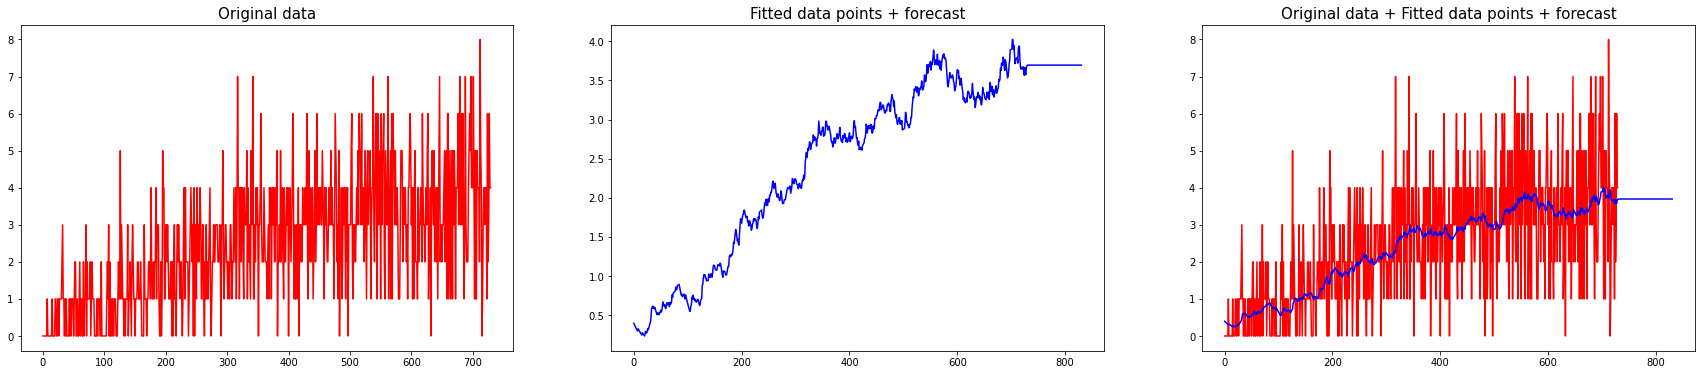

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd

fig = plt.figure(figsize=(30, 6))

steps_to_forecast = 100

data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

optimized_model = SimpleExpSmoothing(data).fit()
optimized_forecast = optimized_model.forecast(steps_to_forecast)
print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Original data", fontsize=15)
ax.plot(data, color="red") 

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Fitted data points + forecast", fontsize=15)
no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                               optimized_forecast.array.reshape(1, -1)))
ax.plot(no_weight_history.reshape(-1,), color='blue') 

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
ax.plot(data, color="red") 
ax.plot(no_weight_history.reshape(-1,), color="blue") 

plt.show()


# Exponential smoothing - Holt’s Method

Reference
 
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Method

1296.5177819299481 728    3.869563
729    3.877125
730    3.884529
731    3.889354
732    3.894178
733    3.899003
dtype: float64 3.8845288907735336


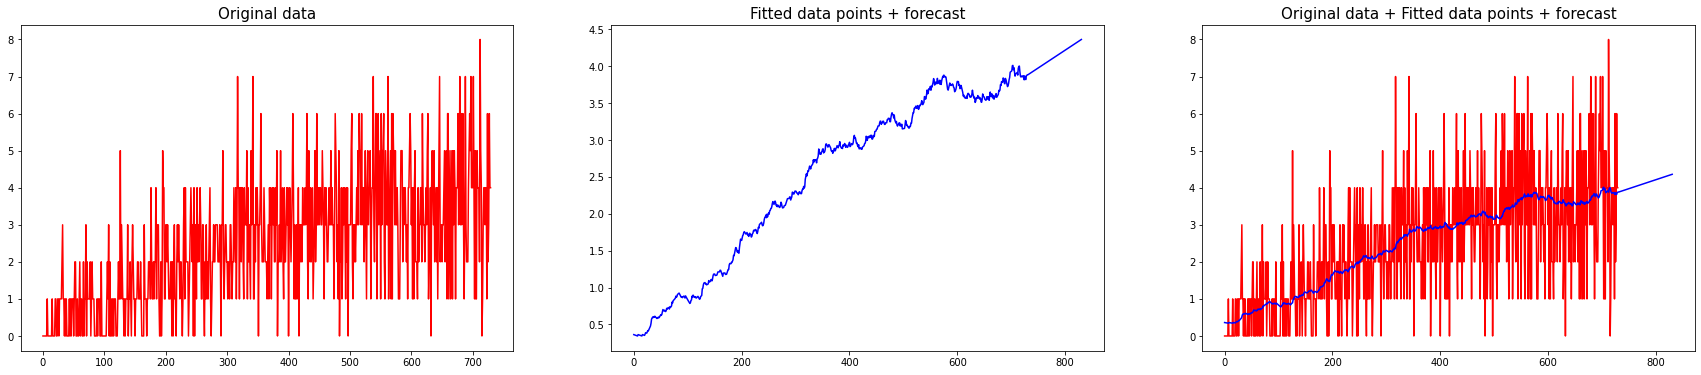

In [ ]:
from statsmodels.tsa.api import Holt
import pandas as pd

fig = plt.figure(figsize=(30, 6))

steps_to_forecast = 100

data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

#optimized_model = Holt(data, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
optimized_model = Holt(data).fit(optimized=True)
optimized_forecast = optimized_model.forecast(steps_to_forecast)
print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])


ax = fig.add_subplot(1, 3, 1)
ax.set_title("Original data", fontsize=15)
ax.plot(data, color="red") 

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Fitted data points + forecast", fontsize=15)
no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                               optimized_forecast.array.reshape(1, -1)))
ax.plot(no_weight_history.reshape(-1,), color='blue') 

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
ax.plot(data, color="red") 
ax.plot(no_weight_history.reshape(-1,), color="blue") 

plt.show()

In [ ]:
optimized_model.sse